In [1]:
%reset -f
import numpy as np

In [2]:
#Data unpacking block
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

X_train, X_test, y_train, y_test = prepare_dataset_mnist()
print(X_train.shape, 'fashion mnist training set shape')
print(y_train[0])

#X_train, X_test, y_train, y_test = prepare_dataset_mat('C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\svhn/train_32x32.mat', 
#                    'C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\svhn/test_32x32.mat')
#print(X_train.shape, 'Google SVHN X_train shape')

(60000, 28, 28, 1) fashion mnist training set shape
5


In [ ]:
#Model training block
from train_CNN_VAE import train_model
weights_name = 'SVHN_pipeline_weights_test'
train_model(X_train, X_test, epochs = 100, dim_representation = 10, b_f = 16, save_weight_name = weights_name) #(train_set, test_set, modelname, desired epochs, filename to save to)

In [4]:
#Reconstruction block
from VAE_reconstruct import reconstruct_images
#reconstruct_images(X_test, dim_representation=100, b_f=128, filename_weights= 'C:\\Users\\31687\\Desktop\\VAE-SVHN-master\\Automated\\dataset_mnist_run_initial\\dataset_0_run_initial_ndim_100_filters_128')

reconstruct_images(X_test, dim_representation=2, b_f=64, filename_weights= 'C:\\Users\\31687\\Desktop\\VAE-SVHN-master\\Automated\\dataset_mnist_run_initial\\mnist_ndim_2_filters_64')


10000/10000 [==============================] - 1s 113us/sample
[9.25496399e-01 1.00732441e+01 5.75039208e-01 5.55552483e-01
 3.59954214e+00 6.68722808e-01 2.39125991e+00 5.02683252e+03
 1.06065922e+01 1.30183864e+00 3.40260297e-01 1.87344341e+01
 6.30627096e-01 4.13747358e+00 1.54676890e+00 1.05466013e+01
 3.85973573e+00 1.01424205e+00 4.33262520e+01 1.92754388e+00
 6.97270095e-01 5.51493835e+00 3.18285418e+00 1.31372404e+00
 1.17094763e+03 4.42794621e-01 1.65681286e+01 4.66373825e+00
 8.51414084e-01 2.84473586e+00 2.69913554e+00 3.50673389e+00
 4.90709496e+00 8.30171490e+00 9.27585781e-01 9.44164181e+00
 7.95413792e-01 1.36351371e+00 1.98464062e+06 1.30124331e+00
 1.41721785e+00 1.63712728e+00 2.17517376e+00 6.73673773e+00
 3.56991053e+00 4.16358042e+00 1.04496593e+01 1.78404880e+00
 1.94312382e+00 4.91754198e+00 2.79934096e+00 4.27431107e+00
 3.04578757e+00 1.63953686e+01 1.41188269e+01 1.38381016e+00
 7.18198252e+00 6.89689517e-01 2.95913005e+00 1.13149795e+04
 2.61412029e+01 5.2957

In [7]:
import numpy as np
reconstructed_images = np.load('C:\\Users\\31687\\Desktop\\VAE-SVHN-master\\Automated\\dataset_mnist_run_initial\\mnist_ndim_10_filters_64_reconstructed_images.npy')

In [ ]:
import matplotlib.pyplot as plt
def overview_dataset(labels):
    
    unique_elements, counts_elements = np.unique(labels, return_counts=True)
    print("Frequency of unique values of the said array:")
    print(np.asarray((unique_elements, counts_elements)))
    print(np.asarray(unique_elements).shape)
    
    heights = counts_elements
    y_pos = range(len(unique_elements))
    plt.bar(y_pos, heights)
    # Rotation of the bars names
    plt.xticks(y_pos, unique_elements, rotation=90)
    plt.xlabel('Class Label Name')
    plt.ylabel('Counts Class Label')
    
    
    return
overview_dataset(y_train)
overview_dataset(y_test)
    


In [ ]:
from Label_index_utility import label_indexer # feed y_test or y_train into label_indexer)
sorted_data = label_indexer(y_test)
print(sorted_data.shape)
sorted_data[0].shape 


2.6124742

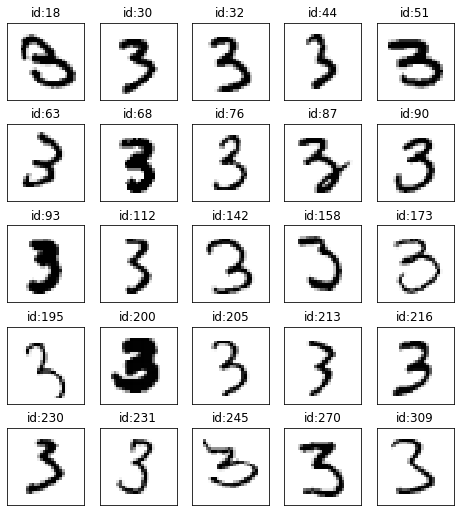

None


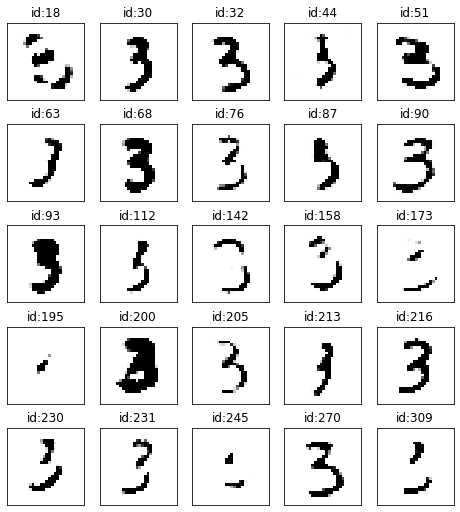

None


In [9]:
from visualizing_images import visualize_images #does pyplot and makes a grid of data

print(visualize_images(X_test, y_test, 3))
print(visualize_images(reconstructed_images, y_test, 3))

In [ ]:
reconstruction_error = np.load('SVHN_pipeline_weights_test_recon_error.npy')
a = np.stack((y_test,reconstruction_error),axis=-1)
a.shape


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(a)
df.columns = ['Label', 'Reconstruction_error']
df.index = np.arange(1, len(df)+1)
df

#data = pd.concat([df['SalePrice'], df[var]], axis=1)
data = df
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Label', y='Reconstruction_error', data=data)
fig.axis(ymin=0, ymax=reconstruction_error[np.argmax(reconstruction_error)]+reconstruction_error[np.argmax(reconstruction_error)]*0.1);

In [ ]:
##boxplot of errors per class:
import seaborn as sns
import pandas as pd

var = reconstruction_error
data = pd.concat([y_test, var], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=y_test, y=var, data=data)
fig.axis(ymin=0, ymax=20);



In [ ]:
# train on one dataset, validate on completely different dataset

In [ ]:
#Model training block
from train_CNN_VAE import train_model
weights_name = 'SVHN_pipeline_weights_test'
train_model(X_train, X_test, epochs = 100, dim_representation = 10, b_f = 16, save_weight_name = weights_name) #(train_set, test_set, modelname, desired epochs, filename to save to)

#Reconstruction block
from VAE_reconstruct import reconstruct_images
reconstruct_images(OTHER_TEST_SET, dim_representation=100, b_f=16, filename_weights= weights_name)


In [ ]:
# train on one dataset with 1 label excluded, evaluate on the same dataset with full data.

In [ ]:
#train on dataset where one label is excluded, validate on completely different dataset
import numpy as np
#Data unpacking block
from dataset_unpacking_utility import prepare_dataset_mat, prepare_dataset_fashion_mnist, prepare_dataset_mnist

X_train, X_test, y_train, y_test = prepare_dataset_mnist()
labels_to_exclude = np.arange(10)



In [ ]:
def train_one_label_excluded(X_train, X_test, y_train):
    from train_CNN_VAE import train_model
    
    labels_to_exclude = np.arange(10)
    
    # remove single label and loop over all possible labels
    for exclude_label in labels_to_exclude:
        incomplete_training_set = []
        for i in range(len(y_train)):
            if y_train[i] != exclude_label:
                incomplete_training_set.append(X_train[i])
        incomplete_training_set = np.array(incomplete_training_set)
    
        print('Shape of new X_train: ', incomplete_training_set.shape)
    
    
        weights_name = 'Exclude_one_label_'+str(exclude_label)
        train_model(incomplete_training_set, X_test, epochs = 1, dim_representation = 10, b_f = 16, save_weight_name = weights_name) #(train_set, test_set, modelname, desired epochs, filename to save to)
    
    return 

train_one_label_excluded(X_train, X_test, y_train)
    

In [ ]:
def evaluate_full_data(X_test):
    #Reconstruction block
    labels_to_exclude = np.arange(10)
    
    from VAE_reconstruct import reconstruct_images
    
    for exclude_label in labels_to_exclude:
        weights_name = 'Exclude_one_label_'+str(exclude_label)
        reconstruct_images(X_test, dim_representation=10, b_f=16, filename_weights= weights_name)

evaluate_full_data(X_test)

In [ ]:
import numpy as np
reconstructed_images = np.load('C://tmp//draw//TESTYTESTY_notMNIST.npy', allow_pickle=True)

In [ ]:
import numpy as np

def prepare_dataset_fashion_mnist():
    import gzip
    
    directory = 'C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\notMNIST'
    file = directory + '/t10k-images-idx3-ubyte.gz'
    filePath_test_set = file
    
    directory = 'C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\notMNIST'
    file = directory + '/t10k-labels-idx1-ubyte.gz'
    filePath_test_label = file
    
    directory = 'C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\notMNIST'
    file = directory + '/train-images-idx3-ubyte.gz'
    filePath_train_set = file
    
    directory = 'C:\\Users\\31687\\Desktop\\draw_tensorflow\\draw\\notMNIST'
    file = directory + '/train-labels-idx1-ubyte.gz'
    filePath_train_label = file
    
    with gzip.open(filePath_test_label, 'rb') as trainLbpath:
         y_test = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                                   offset=8)
    
    with gzip.open(filePath_test_set, 'rb') as trainSetpath:
         X_test = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                                   offset=16).reshape(len(y_test), 28, 28, 1)/255.0
            
    with gzip.open(filePath_train_label, 'rb') as trainLbpath:
         y_train = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                                   offset=8)
    with gzip.open(filePath_train_set, 'rb') as trainSetpath:
         X_train = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                                   offset=16).reshape(len(y_train), 28, 28, 1)/255.0
        
    return X_train, X_test, y_train, y_test

_, X_test, _, y_test = prepare_dataset_fashion_mnist()

In [ ]:
np.array(reconstructed_images[3]).shape

In [ ]:
reconstructed_images = np.load('C://tmp//draw//TESTYTESTY_notMNIST.npy', allow_pickle=True)
print(np.array(reconstructed_images[4]).shape)
reconstructed_images = np.array([np.reshape(array, (28,28)) for array in reconstructed_images[4]])
reconstructed_images.shape

#baba = []
#for a in reconstructed_images[4]:
#    print(a.shape)
#    baba.append(np.reshape(np.array(a), (28,28)))
#baba = np.array(baba)
#baba.shape

In [ ]:
from visualizing_images import visualize_images #does pyplot and makes a grid of data

print(visualize_images(X_test, y_test, 0))
print(visualize_images(reconstructed_images, y_test, 0))

In [ ]:
# todo: Train multiple models of draw. automate it 
def model as function and loop over multiple functions 